In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import EarthLocation, AltAz, get_sun
from astropy.time import Time, TimeDelta
import astropy.units as u

Traceback (most recent call last):
  File "c:\python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\python39\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Python39\Scripts\pip.exe\__main__.py", line 4, in <module>
ModuleNotFoundError: No module named 'pip'


In [31]:
# Especificar la fecha y hora de inicio
year = 2024
month = 3
day = 8
hour_start = 10
minute_start = 00

# Especificar la hora y minuto de finalización
hour_stop = 12
minute_stop = 00

# Crear el objeto Time para la fecha y hora de inicio y finalización
start_time = Time(f"{year}-{month:02d}-{day:02d} {hour_start:02d}:{minute_start:02d}:00")
stop_time = Time(f"{year}-{month:02d}-{day:02d} {hour_stop:02d}:{minute_stop:02d}:00")

# Ubicación en la Tierra (Ventspils, Latvia)
latitude = 57.5535171694 
longitude = 21.8545525000
elevation = 20  # Elevación en metros (opcional)

# Crear un objeto EarthLocation con la ubicación dada
location = EarthLocation(lat=latitude, lon=longitude, height=elevation)

# Calcular la duración en minutos
duration = (stop_time - start_time).to(u.minute).value

# Intervalo de 1 minuto
intervalo = 1  

# Crear una secuencia de tiempos para cada minuto dentro de la duración
times = start_time + np.arange(0, duration , intervalo) * u.minute



In [32]:
# Lists to store Sun altitudes, azimuths, and visibility
sun_altitudes = []
sun_azimuths = []
sun_visible = []

# Calculate the position of the Sun for each minute
for time in times:
    # Calculate the position of the Sun in altazimuthal coordinates
    sun_altaz = get_sun(time).transform_to(
        AltAz(obstime=time, location=location))

    # Check if the Sun is above the horizon
    if sun_altaz.alt.deg > 0:
        sun_visible.append(True)
    else:
        sun_visible.append(False)

    # Store the altitude and azimuth of the Sun
    sun_altitudes.append(sun_altaz.alt.deg)
    sun_azimuths.append(sun_altaz.az.deg)


In [33]:
# Open the text file
with open('proba_refr.txt', 'r') as file:
    lines = file.readlines()

# Initialize lists to store azimuth and elevation
azimuth_proba = []
elevation_proba = []

# Iterate over each line in the file
for line in lines:
    # Split the line into words separated by whitespace
    words = line.split()
    # Check if the line contains azimuth and elevation values
    if len(words) >= 4 and all(word.replace('.', '', 1).isdigit() for word in words[1:]):
        # Get the azimuth and elevation values and convert them to float
        az = float(words[2])
        el = float(words[3])
        # Append the values to the corresponding lists
        azimuth_proba.append(az)
        elevation_proba.append(el)

print(azimuth_proba)
print(sun_azimuths)


[167.86969, 168.14819, 168.42685, 168.70564, 168.98458, 169.26366, 169.54289, 169.82224, 170.10172, 170.38133, 170.66108, 170.94093, 171.2209, 171.50099, 171.7812, 172.0615, 172.3419, 172.62242, 172.90303, 173.18372, 173.46451, 173.74539, 174.02635, 174.30738, 174.58849, 174.86968, 175.15093, 175.43224, 175.71362, 175.99507, 176.27655, 176.55809, 176.83968, 177.12131, 177.40297, 177.68467, 177.96642, 178.24818, 178.52996, 178.81177, 179.09361, 179.37544, 179.65729, 179.93914, 180.22101, 180.50286, 180.78471, 181.06657, 181.34839, 181.6302, 181.912, 182.19378, 182.47552, 182.75723, 183.03891, 183.32056, 183.60215, 183.8837, 184.16521, 184.44667, 184.72806, 185.00939, 185.29066, 185.57188, 185.85301, 186.13407, 186.41506, 186.69596, 186.97677, 187.2575, 187.53815, 187.81868, 188.09912, 188.37947, 188.6597, 188.93982, 189.21983, 189.49972, 189.77951, 190.05916, 190.33868, 190.61809, 190.89734, 191.17647, 191.45545, 191.73431, 192.013, 192.29155, 192.56996, 192.84819, 193.12627, 193.40419,

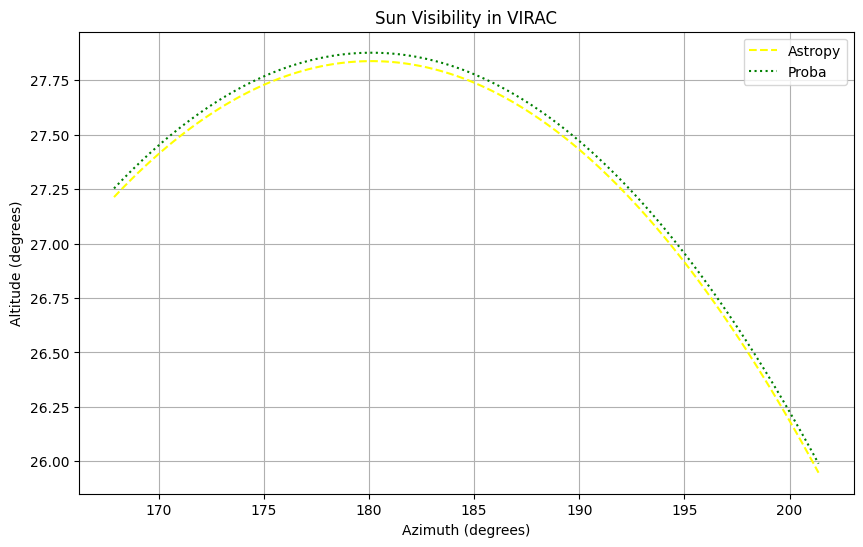

In [34]:
# Convert lists to numpy arrays
sun_altitudes = np.array(sun_altitudes)
sun_azimuths = np.array(sun_azimuths)

# Plot the positions of the Sun in altazimuthal coordinates
plt.figure(figsize=(10, 6))

# Plot when the Sun is visible
plt.plot(sun_azimuths, sun_altitudes, '--', color='yellow', label='Astropy')

# Plot when the Sun is visible
plt.plot(azimuth_proba, elevation_proba, ':', color='green', label='Proba')

plt.xlabel('Azimuth (degrees)')
plt.ylabel('Altitude (degrees)')
plt.title('Sun Visibility in VIRAC')
plt.legend()
plt.grid(True)
plt.show()


In [35]:
#calculate the error
error_azimuth = (sun_azimuths - azimuth_proba)*3600
error_elevation = (sun_altitudes - elevation_proba)*3600


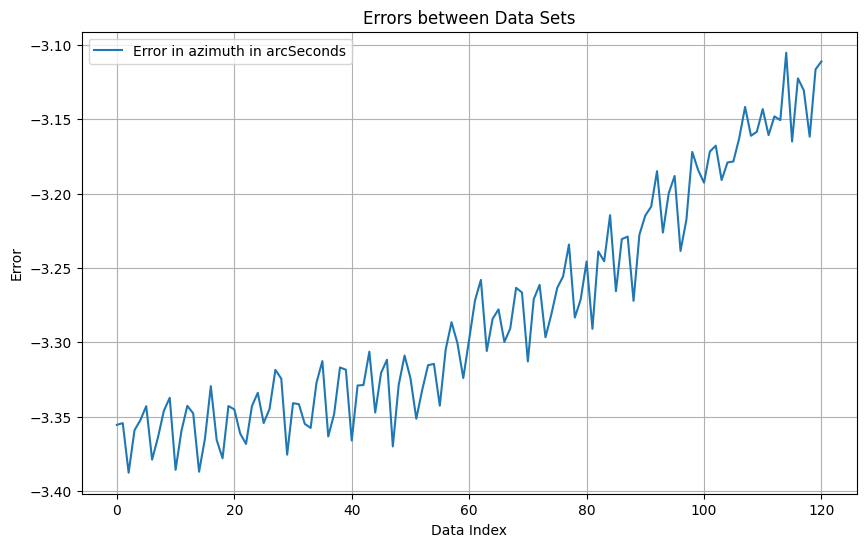

In [36]:
# Plot the errors
plt.figure(figsize=(10, 6))

# Plot the error in azimuth
plt.plot(error_azimuth, linestyle='-', label='Error in azimuth in arcSeconds')

# Axis labels and title
plt.xlabel('Data Index')
plt.ylabel('Error')
plt.title('Errors between Data Sets')
plt.grid(True)
plt.legend()  # Show legend
plt.show()


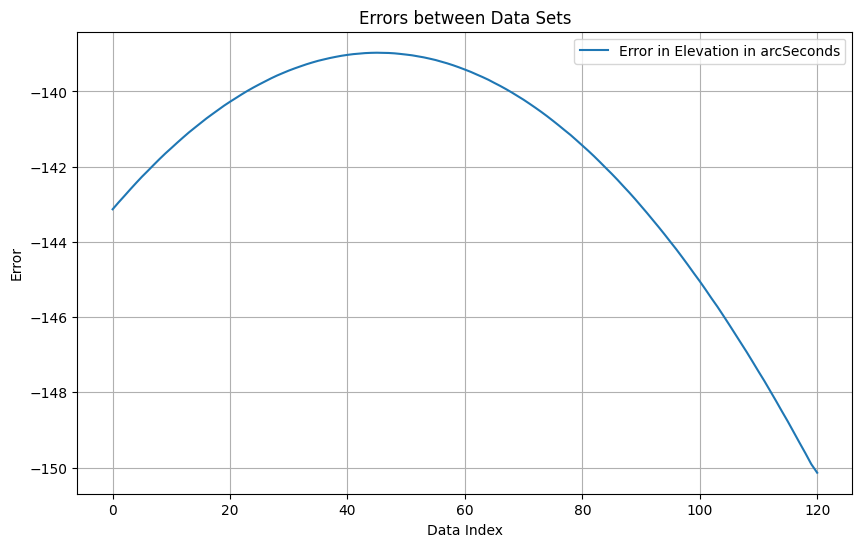

In [37]:
# Plot the errors
plt.figure(figsize=(10, 6))

# Plot the error in elevation
plt.plot(error_elevation, linestyle='-', label='Error in Elevation in arcSeconds')

# Axis labels and title
plt.xlabel('Data Index')
plt.ylabel('Error')
plt.title('Errors between Data Sets')
plt.grid(True)
plt.legend()  # Show legend
plt.show()


In [38]:
print("Sum elevation arcSen: ",np.sum(error_elevation))
print("Sum azimuth arcSen: ",np.sum(error_azimuth))

Sum elevation arcSen:  -17168.013550223517
Sum azimuth arcSen:  -396.8061618184379
